In [0]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

In [0]:
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [0]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-28,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
1,2014-05-29,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
2,2014-05-30,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
3,2014-06-02,90.565712,90.690002,88.928574,89.807144,81.339699,92337700
4,2014-06-03,89.779999,91.248573,89.750000,91.077141,82.489952,73177300


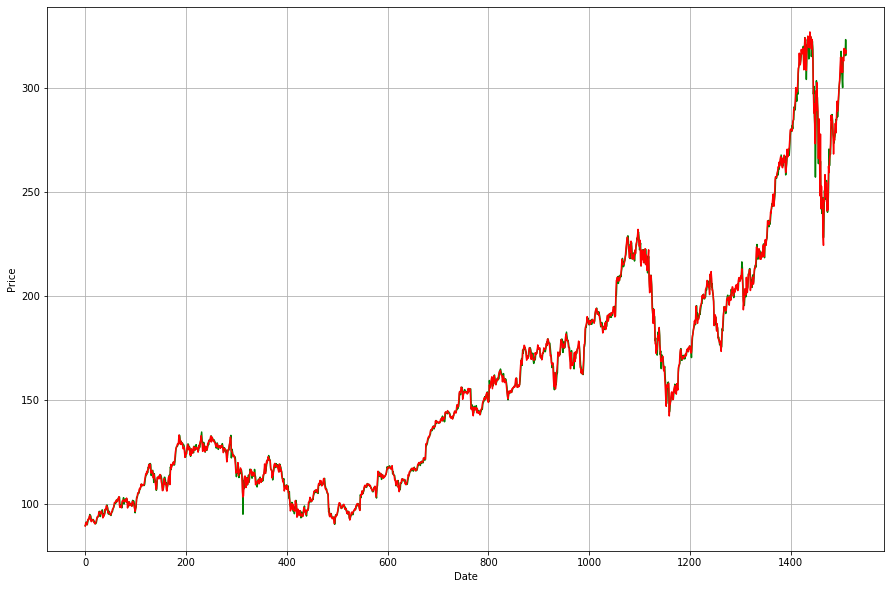

In [0]:
plt.figure(figsize=[15,10])
plt.grid()
plt.plot(df['Open'], 'g')
plt.plot(df['Close'], 'r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [0]:
data = df[['Open']].values
print(data)

[[ 89.431427]
 [ 89.692856]
 [ 91.139999]
 ...
 [315.769989]
 [323.5     ]
 [316.140015]]


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
data = sc.fit_transform(data)
print(data)

[[0.        ]
 [0.00111101]
 [0.00726099]
 ...
 [0.96187984]
 [0.99473037]
 [0.96345235]]


In [0]:
train_data = data[:-300]
test_data = data[-300:]
print(train_data.shape)
print(test_data.shape)

(1211, 1)
(300, 1)


In [0]:
x_train = []
y_train = []
history = 100
for i in range(history,len(train_data)):
  x_train.append(train_data[i-history:i, 0])
  y_train.append(train_data[i])
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1111, 100)
(1111, 1)


In [0]:
print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(1111, 100)
(1111, 100, 1)


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [0]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [0]:
fit_history = regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1111/1111 [==============================] - 10s 9ms/step - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 2/100
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 3/100
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 4/100
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 5/100
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 6/100
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 7/100
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 8/100
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 9/100
1111/1111 [==============================] - 8s 7ms/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 10/100
1111/1111 [============

In [0]:
x_test = []
for i in range(len(data)-300, len(data)):
  x_test.append(data[i-history:i, 0])
x_test = np.array(x_test)
x_test.shape

(300, 100)

In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(300, 100, 1)

In [0]:
y_test = test_data

In [0]:
predicted_values = regressor.predict(x_test)

In [0]:
predicted_values.shape

(300, 1)

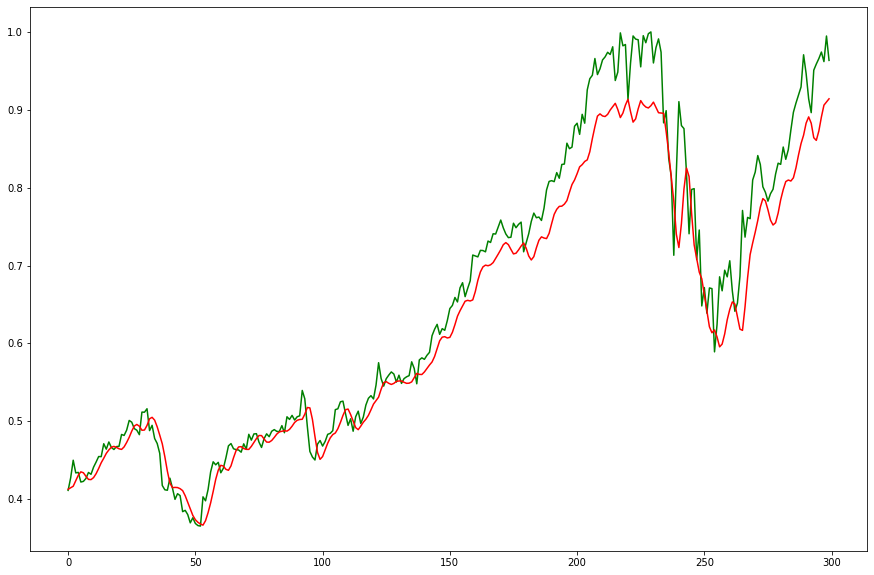

In [0]:
plt.figure(figsize=[15,10])
plt.plot(y_test, 'g')
plt.plot(predicted_values, 'r')
plt.show()

In [0]:
y_test = np.reshape(y_test, (y_test.shape[0],y_test.shape[1]))
predicted_values = np.reshape(predicted_values, (predicted_values.shape[0],predicted_values.shape[1]))
print(y_test.shape)
print(predicted_values.shape)

(300, 1)
(300, 1)


In [0]:
y_test = sc.inverse_transform(y_test)
predicted_values = sc.inverse_transform(predicted_values)

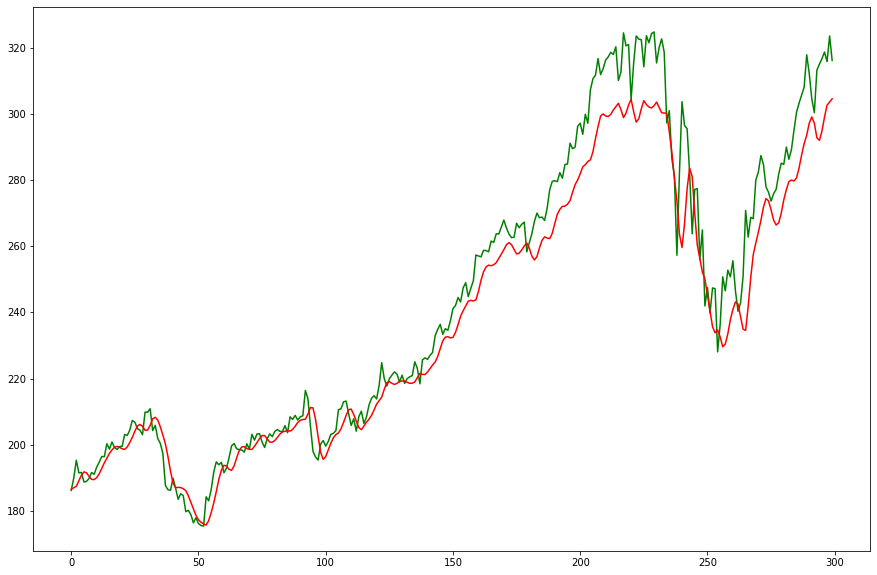

In [0]:
plt.figure(figsize=[15,10])
plt.plot(y_test, 'g')
plt.plot(predicted_values, 'r')
plt.show()

In [0]:
predicted_values

array([[186.56274],
       [187.02893],
       [187.47679],
       [189.12155],
       [190.81439],
       [191.82697],
       [191.55038],
       [190.48587],
       [189.54092],
       [189.48296],
       [190.09227],
       [191.28291],
       [192.85143],
       [194.57053],
       [195.94293],
       [197.40756],
       [198.45045],
       [199.25945],
       [199.52321],
       [199.20496],
       [198.79565],
       [198.60645],
       [199.36678],
       [200.70184],
       [202.2673 ],
       [204.1178 ],
       [205.66383],
       [206.14502],
       [205.61078],
       [204.39322],
       [204.45752],
       [205.8463 ],
       [207.86342],
       [208.30069],
       [207.44533],
       [205.43008],
       [202.9242 ],
       [200.29074],
       [196.42757],
       [192.04218],
       [188.44011],
       [187.05383],
       [187.12956],
       [187.08228],
       [186.74254],
       [186.15547],
       [184.62515],
       [182.6151 ],
       [180.61258],
       [178.66653],
